In [113]:
import importlib
import pymate
import plotly.express as px
pymate = importlib.reload(pymate)

In [114]:
pymate.seasonality = 0.0
pymate.number_females = 40
pymate.number_males = 40
model = pymate.population()
model.evolve()

36
69


In [119]:
model_data = pymate.pd.DataFrame([{
    'id':
    g.id,
    'females':
    len(
        pymate.np.concatenate((model.groups[0].females_not_yet_cycling,
                               model.groups[0].females_cycling,
                               model.groups[0].females_finished_cycling))),
    'cycling females':
    len(model.groups[0].females_cycling),
    'males':
    len(g.males)
} for g in model.groups])

mating_dfs = []

for g in model.groups:
    mating_dfs.append(pymate.pd.DataFrame(g.mating_matrix).round(2).set_axis(
        ['m{}'.format(m) for m in range(pymate.number_males)],
        axis=1,
        inplace=False).set_axis(
            ['f{}'.format(f) for f in range(pymate.number_females)],
            axis=0,
            inplace=False))

#pymate.sns.heatmap(a,cmap='RdYlGn_r', linewidths=0.5, annot=True)


In [122]:
model_data

,id,females,cycling females,males
0,0,40,0,40
1,1,40,0,40
2,2,40,0,40


In [129]:
female_data

,id,status,days until cycling,days until conception,conception probability,fertile mating success
0,0,not yet cycling,281,50,N/A,0.0
1,1,not yet cycling,348,50,N/A,0.0
2,2,not yet cycling,325,50,N/A,0.0
3,4,not yet cycling,205,50,N/A,0.0
4,5,not yet cycling,191,50,N/A,0.0
5,6,not yet cycling,263,50,N/A,0.0
6,7,not yet cycling,13,50,N/A,0.0
7,8,not yet cycling,233,50,N/A,0.0
8,9,not yet cycling,362,50,N/A,0.0
9,10,not yet cycling,264,50,N/A,0.0


Text(0, 0.5, 'Mean male conception probability\n across females')

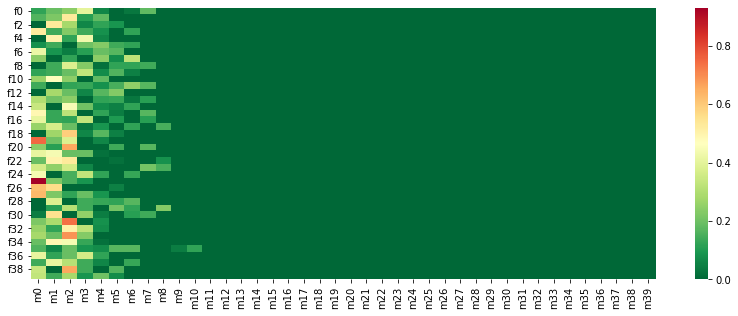

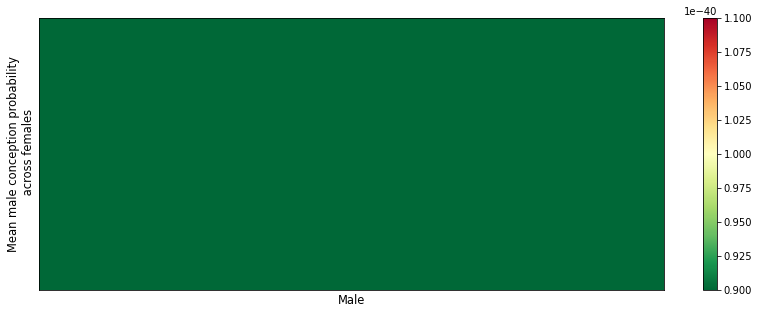

In [105]:
pymate.plt.figure(figsize = (14,5))
fig = pymate.sns.heatmap(a,cmap='RdYlGn_r')

means = np.array([np.mean(i) for i in model.groups[0].mating_matrix.T])
pymate.plt.rc('axes', labelsize=11.5) 
pymate.plt.figure(figsize = (14,5))
fig2 = pymate.plt.imshow(means[np.newaxis,:], cmap="RdYlGn_r", aspect="auto")
pymate.plt.colorbar(fig2)
pymate.plt.yticks([])
pymate.plt.xticks([])
pymate.plt.xlabel('Male')
pymate.plt.ylabel('Mean male conception probability\n across females')


Text(0, 0.5, 'Mean male conception probability\n across females')

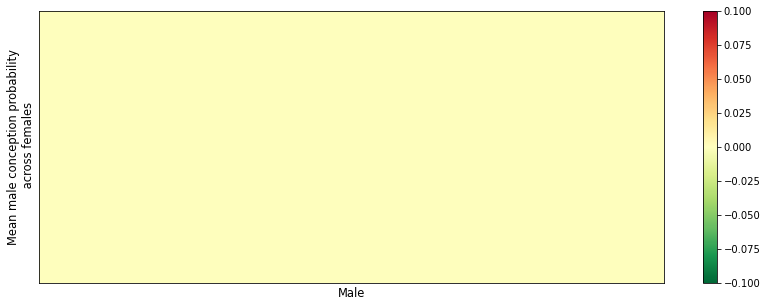

In [106]:

all_parents = [p[1] for p in model.groups[0].parents]
parent_counts = np.array([all_parents.count(m) for m in model.groups[0].males])
pymate.plt.rc('axes', labelsize=11.5) 
pymate.plt.figure(figsize = (14,5))
fig2 = pymate.plt.imshow(parent_counts[np.newaxis,:], cmap="RdYlGn_r", aspect="auto")
pymate.plt.colorbar(fig2)
pymate.plt.yticks([])
pymate.plt.xticks([])
pymate.plt.xlabel('Male')
pymate.plt.ylabel('Mean male conception probability\n across females')

In [102]:
model.groups[0].generate_offspring(model.max_non_cycling_days,
                                   model.conception_probability_list,
                                   model.mean_days_to_conception,
                                   model.sd_days_to_conception)
[m.competitive_effort for m in model.groups[0].males]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]